In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chariyatham","key":"223d01dee13d9b262debec543e3e294a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 92% 201M/218M [00:00<00:00, 257MB/s]
100% 218M/218M [00:00<00:00, 269MB/s]


In [ ]:
!unzip -q cat-and-dog.zip

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ตั้งค่า paths
train_dir = '/content/training_set/training_set'
test_dir = '/content/test_set/test_set'

# สร้าง ImageDataGenerator สำหรับการ augment ข้อมูล
train_datagen = ImageDataGenerator(
    rescale=1./255,  # ปรับค่าสีให้อยู่ในช่วง 0-1
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# โหลดข้อมูล training และ test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # ปรับขนาดภาพเป็น 150x150 พิกเซล
    batch_size=32,
    class_mode='binary'  # binary classification (cat vs dog)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Layer 1: Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

# Layer 2: Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Layer 3: Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Layer 4: Fully Connected Layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # จำนวน epoch
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

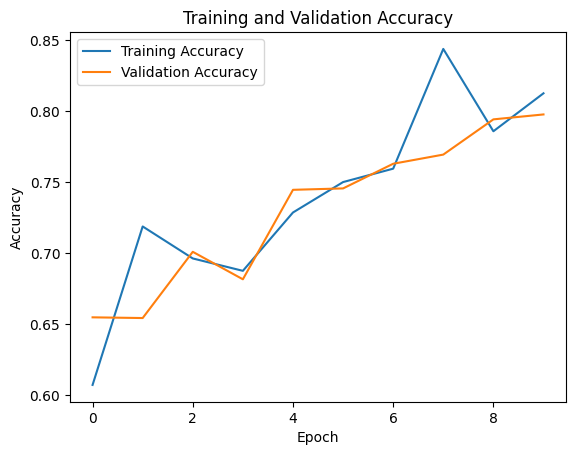

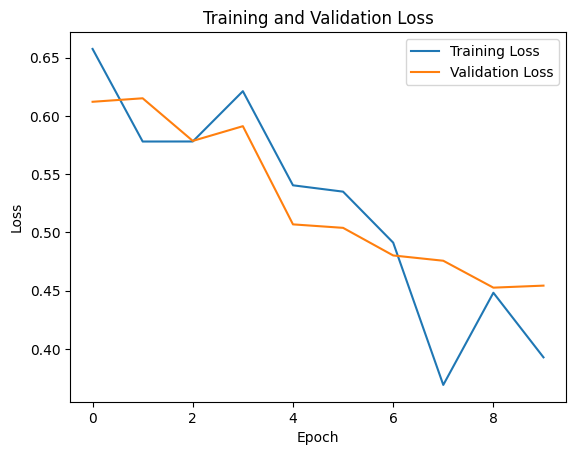

In [ ]:
import matplotlib.pyplot as plt

# พล็อตกราฟ accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# พล็อตกราฟ loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# โหลดภาพ
img_path = '/content/test_set/test_set/cats/cat.4003.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# ทำนาย
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("This is a Dog!")
else:
    print("This is a Cat!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
This is a Cat!


In [ ]:
model.save('cat_dog_classifier.h5')